In [1]:
import pandas as pd

# Load datasets
features_df = pd.read_csv('features.csv')
stores_df = pd.read_csv('stores.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Convert 'Date' columns to datetime
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Merge datasets for training and testing
train_merged = train_df.merge(features_df, on=['Store', 'Date'], how='left')
train_merged = train_merged.merge(stores_df, on='Store', how='left')
test_merged = test_df.merge(features_df, on=['Store', 'Date'], how='left')
test_merged = test_merged.merge(stores_df, on='Store', how='left')

# Handle missing values for 'MarkDown' columns by filling with median
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    train_merged[col].fillna(train_merged[col].median(), inplace=True)
    test_merged[col].fillna(test_merged[col].median(), inplace=True)

# Handle missing values for 'CPI' and 'Unemployment' by filling with median grouped by 'Store'
for col in ['CPI', 'Unemployment']:
    train_merged[col].fillna(train_merged.groupby('Store')[col].transform('median'), inplace=True)
    test_merged[col].fillna(test_merged.groupby('Store')[col].transform('median'), inplace=True)

# Verify missing values
train_missing_after = train_merged.isnull().sum()
test_missing_after = test_merged.isnull().sum()

print("Missing values in train dataset after preprocessing:\n", train_missing_after)
print("Missing values in test dataset after preprocessing:\n", test_missing_after)

Missing values in train dataset after preprocessing:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64
Missing values in test dataset after preprocessing:
 Store           0
Dept            0
Date            0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64


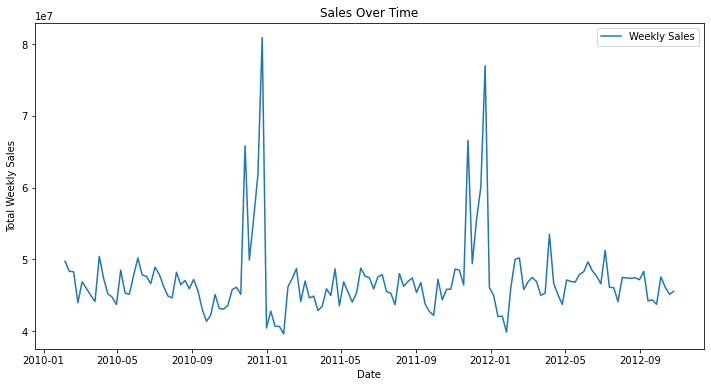

In [2]:
# Aggregate sales by date
sales_by_date = train_merged.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot sales over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'], label='Weekly Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.show()

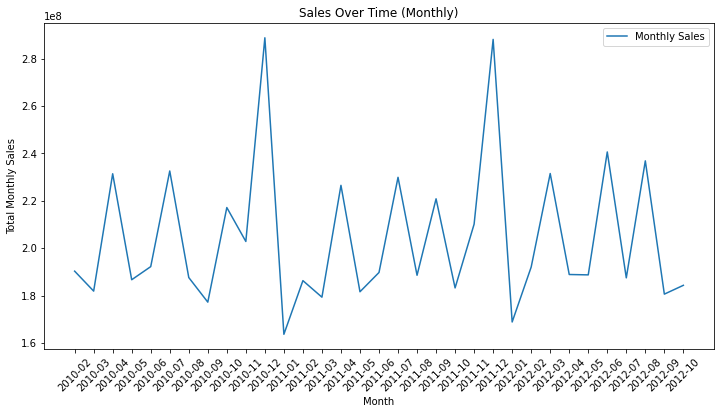

In [3]:
# Add a month component to the data
train_merged['Month'] = train_merged['Date'].dt.to_period('M')

# Aggregate sales by month
sales_by_month = train_merged.groupby('Month')['Weekly_Sales'].sum().reset_index()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month['Month'].astype(str), sales_by_month['Weekly_Sales'], label='Monthly Sales')
plt.title('Sales Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Monthly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

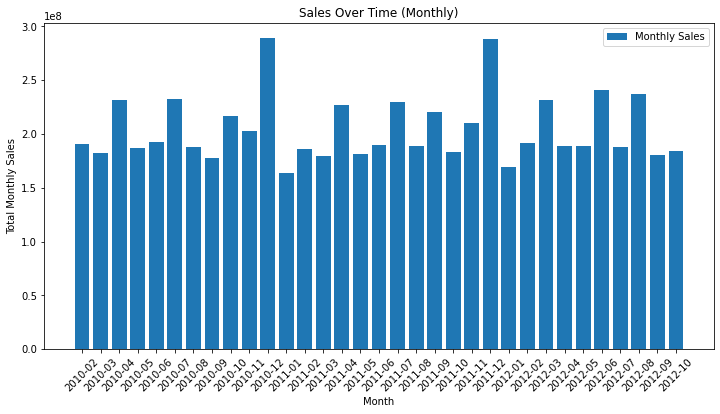

In [4]:
import matplotlib.pyplot as plt

# Plot monthly sales trends as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sales_by_month['Month'].astype(str), sales_by_month['Weekly_Sales'], label='Monthly Sales')
plt.title('Sales Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Monthly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

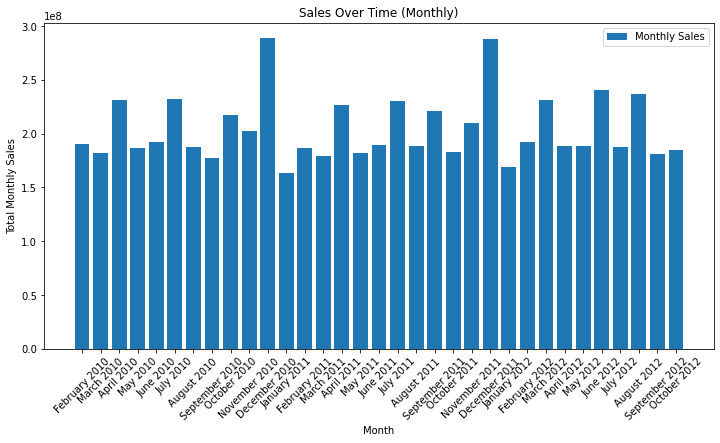

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming train_merged already exists
# Add a month component to the data
train_merged['Month'] = train_merged['Date'].dt.to_period('M')

# Aggregate sales by month
sales_by_month = train_merged.groupby('Month')['Weekly_Sales'].sum().reset_index()

# Convert 'Month' to display month name and year (e.g., "April 2011")
sales_by_month['Month_Name'] = sales_by_month['Month'].dt.strftime('%B %Y')

# Plot monthly sales trends as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sales_by_month['Month_Name'], sales_by_month['Weekly_Sales'], label='Monthly Sales')
plt.title('Sales Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Monthly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

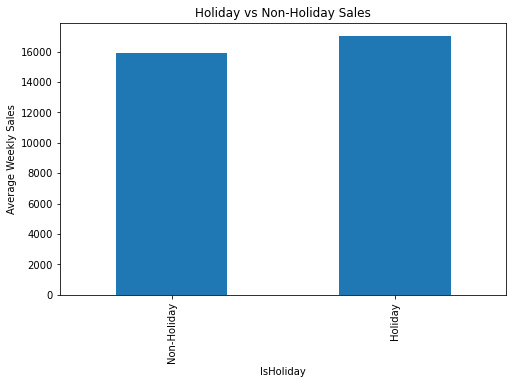

In [6]:
# Compare sales during holidays and non-holidays
holiday_sales = train_merged.groupby('IsHoliday_x')['Weekly_Sales'].mean()

# Plot holiday sales comparison
holiday_sales.plot(kind='bar', figsize=(8, 5), title='Holiday vs Non-Holiday Sales')
plt.xlabel('IsHoliday')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

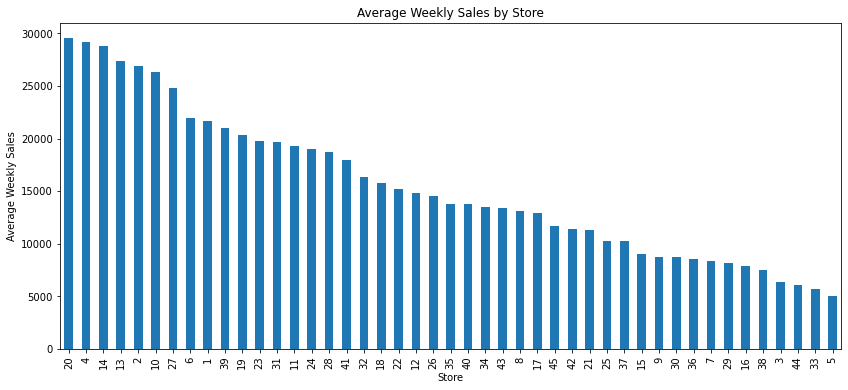

In [7]:
# Aggregate sales by store
sales_by_store = train_merged.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

# Plot sales by store
plt.figure(figsize=(14, 6))
sales_by_store.plot(kind='bar', title='Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()

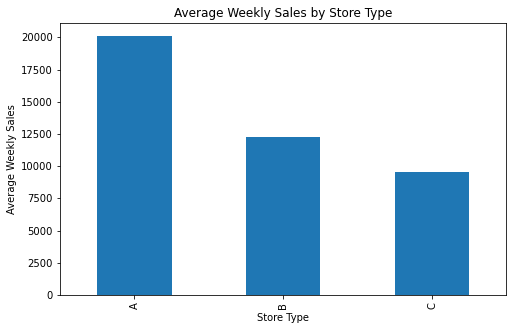

In [8]:
# Aggregate sales by store type
sales_by_type = train_merged.groupby('Type')['Weekly_Sales'].mean()

# Plot sales by store type
sales_by_type.plot(kind='bar', title='Average Weekly Sales by Store Type', figsize=(8, 5))
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()

Correlation Matrix:
               Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.002312   -0.000120 -0.020921     -0.025864
Temperature      -0.002312     1.000000    0.143859  0.182112      0.096730
Fuel_Price       -0.000120     0.143859    1.000000 -0.164210     -0.033853
CPI              -0.020921     0.182112   -0.164210  1.000000     -0.299953
Unemployment     -0.025864     0.096730   -0.033853 -0.299953      1.000000


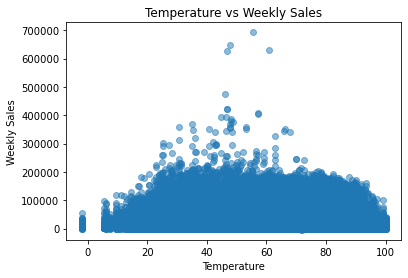

In [9]:
# Correlation matrix for numerical features
corr_matrix = train_merged[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
print("Correlation Matrix:\n", corr_matrix)

# Visualize correlation between Temperature and Weekly Sales
plt.scatter(train_merged['Temperature'], train_merged['Weekly_Sales'], alpha=0.5)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

Markdown Correlation with Sales:
 MarkDown1       0.052739
MarkDown2       0.020342
MarkDown3       0.038524
MarkDown4       0.033820
MarkDown5       0.055702
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64


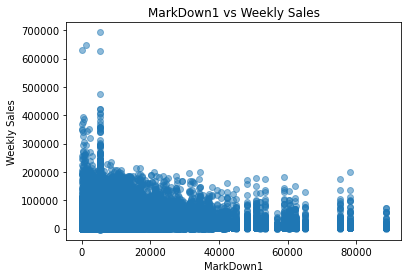

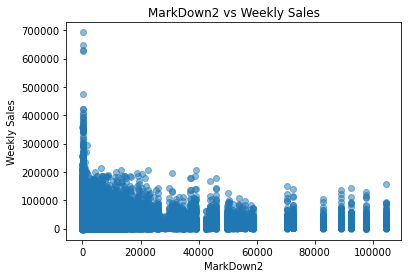

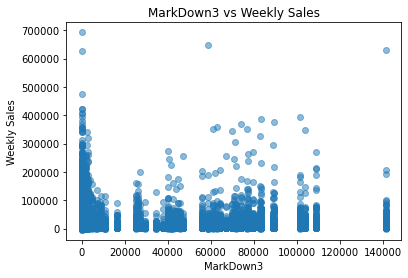

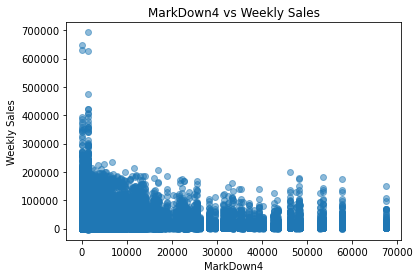

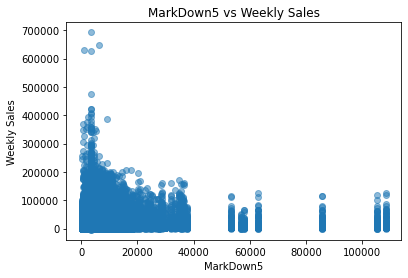

In [10]:
# Correlation of markdowns with sales
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
markdown_effect = train_merged[markdown_cols + ['Weekly_Sales']].corr()
print("Markdown Correlation with Sales:\n", markdown_effect['Weekly_Sales'])

# Scatter plot for each markdown vs sales
for col in markdown_cols:
    plt.scatter(train_merged[col], train_merged['Weekly_Sales'], alpha=0.5)
    plt.title(f'{col} vs Weekly Sales')
    plt.xlabel(col)
    plt.ylabel('Weekly Sales')
    plt.show()

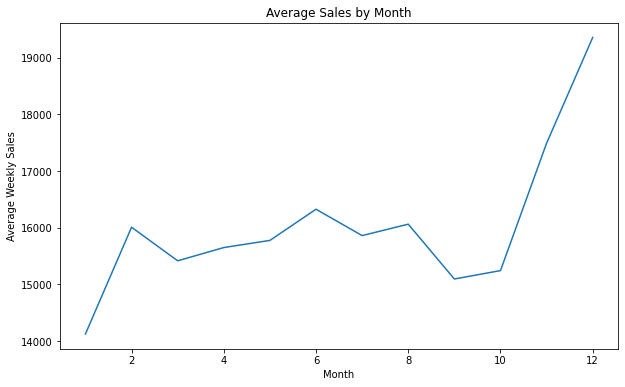

In [11]:
# Add date components
train_merged['Year'] = train_merged['Date'].dt.year
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Week'] = train_merged['Date'].dt.isocalendar().week

# Group sales by month
sales_by_month = train_merged.groupby('Month')['Weekly_Sales'].mean()

# Plot monthly sales trends
sales_by_month.plot(kind='line', title='Average Sales by Month', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Prepare the dataset for linear regression
# Selecting features and target variable
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
target = 'Weekly_Sales'

# Drop rows with missing values in selected columns (if any)
data = train_merged.dropna(subset=features + [target])

# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get model coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lr_model.coef_})

# Output evaluation metrics and coefficients
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("\nModel Coefficients:")
print(coefficients)

Mean Squared Error (MSE): 516629075.95755434
R-squared (R2) Score: 0.009285112664627171

Model Coefficients:
        Feature  Coefficient
0   Temperature    22.671907
1    Fuel_Price  -883.935280
2           CPI   -22.709145
3  Unemployment  -450.035823
4     MarkDown1     0.343969
5     MarkDown2     0.071256
6     MarkDown3     0.171849
7     MarkDown4    -0.217176
8     MarkDown5     0.294156


In [13]:
train_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)  # Sales from last week
train_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)  # Sales from 4 weeks ago

# Drop NaN rows created by shifting
train_lagged = train_merged.dropna()

# Select lagged features and train the model
features = ['Lag_1', 'Lag_4']
target = 'Weekly_Sales'

X = train_lagged[features]
y = train_lagged[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))

R-squared: 0.9100642067781755


Mean Squared Error (MSE): 45246086.07355439
R-squared (R2) Score: 0.9129730381787848

Model Coefficients:
  Feature  Coefficient
0   Lag_1     0.544190
1   Lag_2     0.186419
2   Lag_4     0.244597


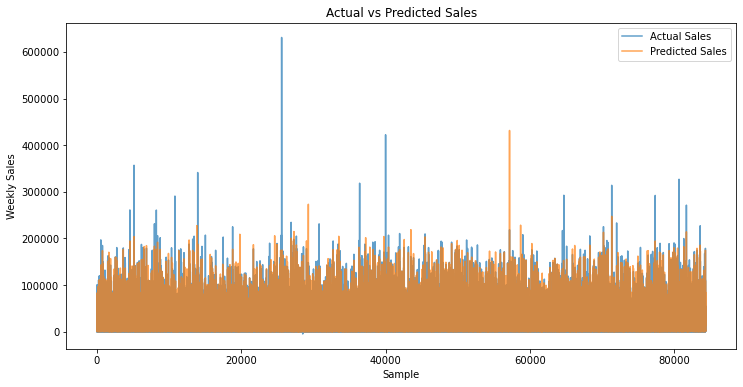

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume train_merged is your dataset with 'Weekly_Sales' and 'Date'

# Step 1: Create Lagged Features
# Shift sales data to create lagged features
train_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)  # 1 week ago
train_merged['Lag_2'] = train_merged['Weekly_Sales'].shift(2)  # 2 weeks ago
train_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)  # 4 weeks ago

# Drop rows with NaN values created by lagging
data = train_merged.dropna(subset=['Lag_1', 'Lag_2', 'Lag_4', 'Weekly_Sales'])

# Step 2: Define Features and Target
features = ['Lag_1', 'Lag_2', 'Lag_4']
target = 'Weekly_Sales'

X = data[features]
y = data[target]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and Train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = lr_model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Step 7: Display Model Coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lr_model.coef_})
print("\nModel Coefficients:")
print(coefficients)

# Step 8: Visualize Actual vs Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", alpha=0.7)
plt.plot(y_pred, label="Predicted Sales", alpha=0.7)
plt.title("Actual vs Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = ['Lag_1', 'Lag_2', 'Lag_4']
target = 'Weekly_Sales'

# Drop rows with missing values
data = train_merged.dropna(subset=features + [target])

# Separate features (X) and target (y)
X = data[features]
y = data[target]

# Normalize the target variable (Standard Scaling)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Normalize the feature variables (Standard Scaling)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_scaled = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

print("Mean Squared Error (MSE) on Scaled Data:", mse)
print("R-squared (R2) Score:", r2)

# To convert scaled predictions back to the original scale
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

Mean Squared Error (MSE) on Scaled Data: 0.08772061979959687
R-squared (R2) Score: 0.912973038178785


/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


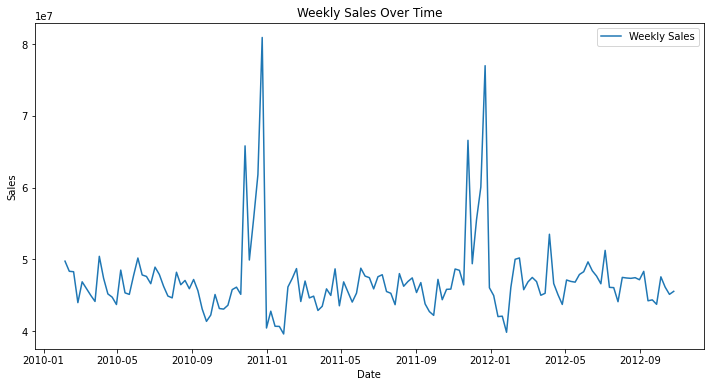

ADF Statistic: -5.908297957186333
p-value: 2.675979158986027e-07
The series is stationary.


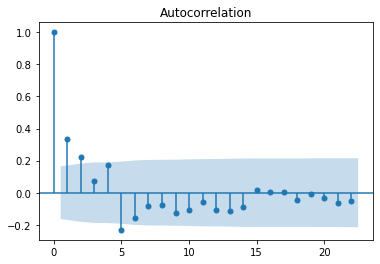

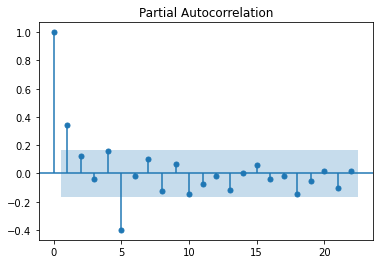

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


Mean Squared Error (MSE): 5437288445505.6455


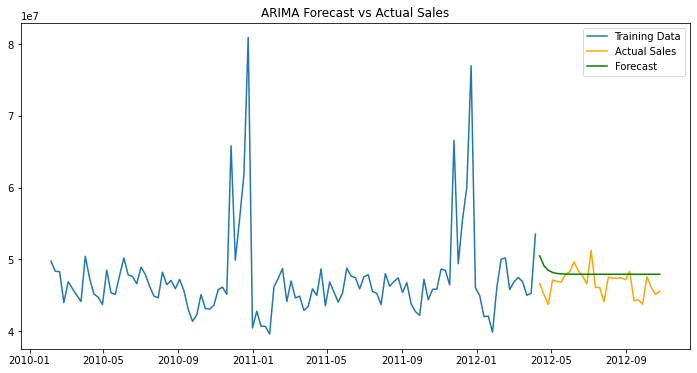

In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Convert 'Date' column to datetime and set as index
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.set_index('Date', inplace=True)

# Aggregate weekly sales for all stores and departments
weekly_sales = train_df.groupby('Date')['Weekly_Sales'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Check for stationarity (ADF test)
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(weekly_sales)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
if adf_test[1] > 0.05:
    print("The series is not stationary, applying differencing.")
    weekly_sales_diff = weekly_sales.diff().dropna()  # Apply differencing
else:
    print("The series is stationary.")
    weekly_sales_diff = weekly_sales

# Plot ACF and PACF to determine p and q
plot_acf(weekly_sales_diff)
plot_pacf(weekly_sales_diff)
plt.show()

# Train-Test Split
train_size = int(len(weekly_sales) * 0.8)
train_data, test_data = weekly_sales[:train_size], weekly_sales[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train_data, order=(1, 1, 1))  # Replace (1, 1, 1) with your selected parameters
arima_result = arima_model.fit()

# Forecast using the ARIMA model
forecast = arima_result.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error (MSE):", mse)

# Plot Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Sales", color="orange")
plt.plot(test_data.index, forecast, label="Forecast", color="green")
plt.title("ARIMA Forecast vs Actual Sales")
plt.legend()
plt.show()

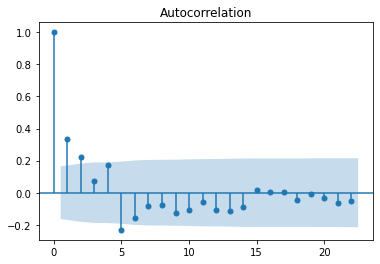

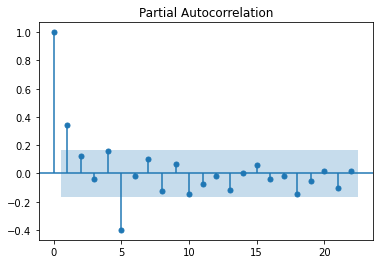

NameError: name 'p' is not defined

In [17]:
# Plot ACF and PACF to determine p and q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(weekly_sales)
plot_pacf(weekly_sales)
plt.show()

# Manually tune ARIMA parameters based on ACF/PACF
arima_model = ARIMA(train_data, order=(p, 0, q))  # Replace p and q with values from plots
arima_result = arima_model.fit()

# Forecast and evaluate
forecast = arima_result.forecast(steps=len(test_data))
mse = mean_squared_error(test_data, forecast)
print("Tuned ARIMA Mean Squared Error (MSE):", mse)

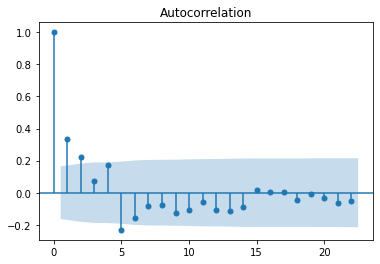

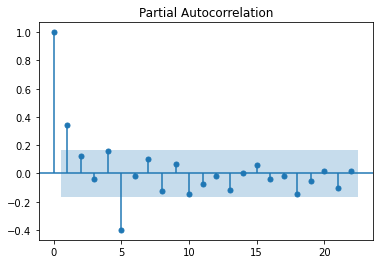

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the original sales data (or differenced data if necessary)
plot_acf(weekly_sales)
plot_pacf(weekly_sales)
plt.show()

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive param

ARIMA Mean Squared Error (MSE): 4008744692900.5884


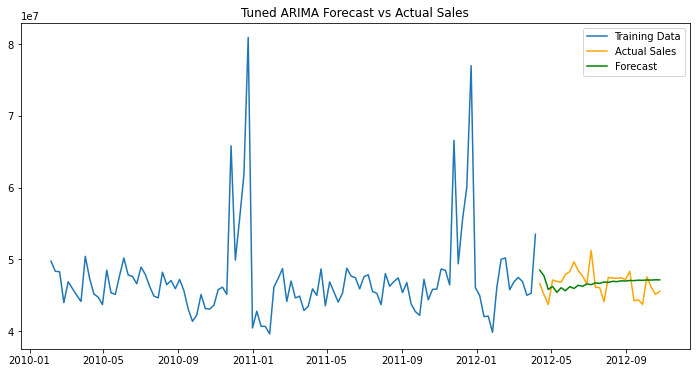

In [19]:
# Fit ARIMA model with determined parameters
p, d, q = 3, 0, 2  # Parameters based on ACF and PACF interpretation
arima_model = ARIMA(train_data, order=(p, d, q))
arima_result = arima_model.fit()

# Forecast using the ARIMA model
forecast = arima_result.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data, forecast)
print("ARIMA Mean Squared Error (MSE):", mse)

# Plot Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Sales", color="orange")
plt.plot(test_data.index, forecast, label="Forecast", color="green")
plt.title("Tuned ARIMA Forecast vs Actual Sales")
plt.legend()
plt.show()

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error (MSE) with Scaled Data: 4115142287161.1167


/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


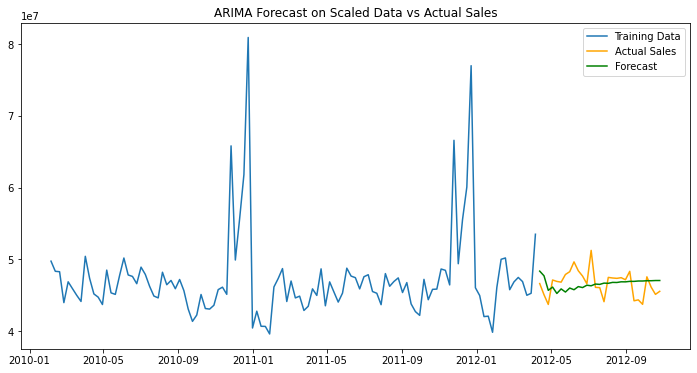

In [20]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Load and prepare data
train_df = pd.read_csv('train.csv')
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.set_index('Date', inplace=True)
weekly_sales = train_df.groupby('Date')['Weekly_Sales'].sum()

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
weekly_sales_scaled = scaler.fit_transform(weekly_sales.values.reshape(-1, 1)).flatten()

# Split data into train and test sets
train_size = int(len(weekly_sales_scaled) * 0.8)
train_data_scaled, test_data_scaled = weekly_sales_scaled[:train_size], weekly_sales_scaled[train_size:]

# Fit ARIMA model on scaled data
p, d, q = 3, 0, 2  # Tuned parameters
arima_model_scaled = ARIMA(train_data_scaled, order=(p, d, q))
arima_result_scaled = arima_model_scaled.fit()

# Forecast on scaled data
forecast_scaled = arima_result_scaled.forecast(steps=len(test_data_scaled))

# Inverse transform predictions back to original scale
forecast_original = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()
test_data_original = scaler.inverse_transform(test_data_scaled.reshape(-1, 1)).flatten()

# Evaluate the model
mse_scaled = mean_squared_error(test_data_original, forecast_original)
print("Mean Squared Error (MSE) with Scaled Data:", mse_scaled)

# Plot Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index[:train_size], scaler.inverse_transform(train_data_scaled.reshape(-1, 1)), label="Training Data")
plt.plot(weekly_sales.index[train_size:], test_data_original, label="Actual Sales", color="orange")
plt.plot(weekly_sales.index[train_size:], forecast_original, label="Forecast", color="green")
plt.title("ARIMA Forecast on Scaled Data vs Actual Sales")
plt.legend()
plt.show()

In [21]:
print(train_df.columns)

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday'], dtype='object')


/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (MSE) with SARIMA (Annual Seasonality): 3021178411762.9253


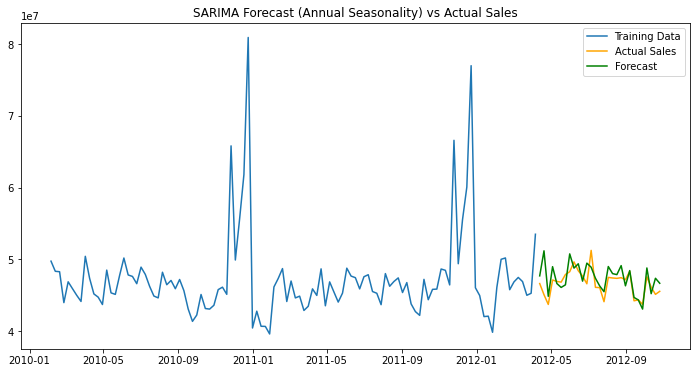

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Set seasonality length (52 for weekly, 12 for monthly)
season_length = 52  # Weekly data with annual seasonality

# Define SARIMA parameters
p, d, q = 3, 0, 2  # From ARIMA tuning
P, D, Q = 1, 1, 1  # Initial seasonal parameters

# Fit SARIMA model
sarima_model = SARIMAX(train_data_scaled, 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, season_length))
sarima_result = sarima_model.fit()

# Forecast future values
forecast_scaled = sarima_result.forecast(steps=len(test_data_scaled))

# Inverse transform predictions back to original scale
forecast_original = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()
test_data_original = scaler.inverse_transform(test_data_scaled.reshape(-1, 1)).flatten()

# Evaluate the model
mse_sarima = mean_squared_error(test_data_original, forecast_original)
print("Mean Squared Error (MSE) with SARIMA (Annual Seasonality):", mse_sarima)

# Plot Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index[:train_size], scaler.inverse_transform(train_data_scaled.reshape(-1, 1)), label="Training Data")
plt.plot(weekly_sales.index[train_size:], test_data_original, label="Actual Sales", color="orange")
plt.plot(weekly_sales.index[train_size:], forecast_original, label="Forecast", color="green")
plt.title("SARIMA Forecast (Annual Seasonality) vs Actual Sales")
plt.legend()
plt.show()

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (MSE) with SARIMA (Annual Seasonality): 3898333851198.535


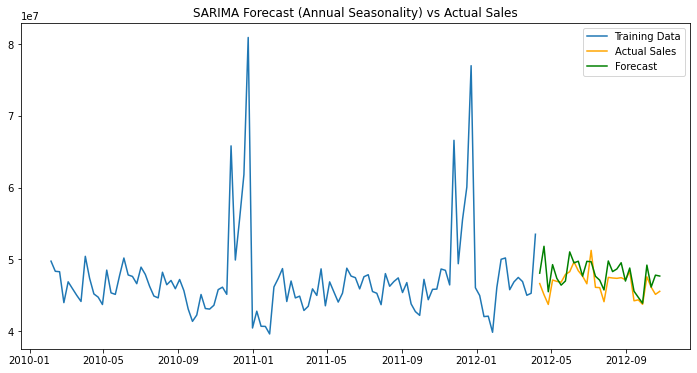

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Set seasonality length (52 for weekly, 12 for monthly)
season_length = 52  # Weekly data with annual seasonality

# Define SARIMA parameters
p, d, q = 3, 0, 2  # From ARIMA tuning
P, D, Q = 2, 1, 2  # Initial seasonal parameters

# Fit SARIMA model
sarima_model = SARIMAX(train_data_scaled, 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, season_length))
sarima_result = sarima_model.fit()

# Forecast future values
forecast_scaled = sarima_result.forecast(steps=len(test_data_scaled))

# Inverse transform predictions back to original scale
forecast_original = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()
test_data_original = scaler.inverse_transform(test_data_scaled.reshape(-1, 1)).flatten()

# Evaluate the model
mse_sarima = mean_squared_error(test_data_original, forecast_original)
print("Mean Squared Error (MSE) with SARIMA (Annual Seasonality):", mse_sarima)

# Plot Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index[:train_size], scaler.inverse_transform(train_data_scaled.reshape(-1, 1)), label="Training Data")
plt.plot(weekly_sales.index[train_size:], test_data_original, label="Actual Sales", color="orange")
plt.plot(weekly_sales.index[train_size:], forecast_original, label="Forecast", color="green")
plt.title("SARIMA Forecast (Annual Seasonality) vs Actual Sales")
plt.legend()
plt.show()

Random Forest - Mean Squared Error (MSE): 27876224.12162944
Random Forest - R-squared (R²): 0.9230316273043732


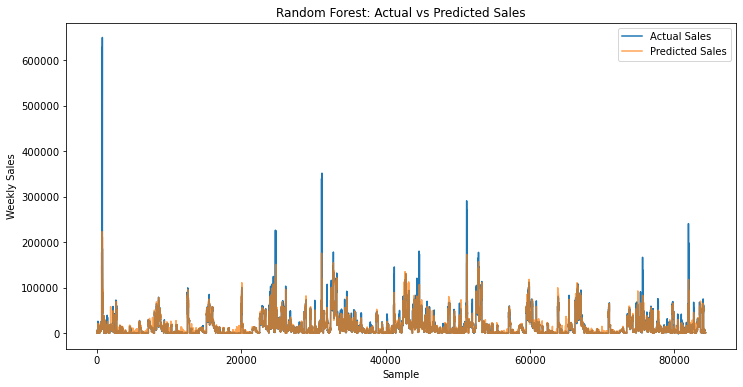

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Prepare the data
# Assuming 'train_merged' contains all features and 'Weekly_Sales'
train_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)
train_merged['Lag_2'] = train_merged['Weekly_Sales'].shift(2)
train_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)
train_merged = train_merged.dropna()  # Drop rows with NaNs from lagged features

# Define features and target
features = ['Lag_1', 'Lag_2', 'Lag_4']
target = 'Weekly_Sales'

X = train_merged[features]
y = train_merged[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest - Mean Squared Error (MSE):", mse)
print("Random Forest - R-squared (R²):", r2)

# Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales", alpha=0.7)
plt.title("Random Forest: Actual vs Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and merge the data
features_path = 'features.csv'
stores_path = 'stores.csv'
train_path = 'train.csv'
test_path = 'test.csv'

features_df = pd.read_csv(features_path)
stores_df = pd.read_csv(stores_path)
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Convert 'Date' columns to datetime
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Merge datasets for train and test
train_merged = train_df.merge(features_df, on=['Store', 'Date'], how='left')
train_merged = train_merged.merge(stores_df, on='Store', how='left')

test_merged = test_df.merge(features_df, on=['Store', 'Date'], how='left')
test_merged = test_merged.merge(stores_df, on='Store', how='left')

# Feature Engineering for Train Data
# 1. Lagged Features
train_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)
train_merged['Lag_2'] = train_merged['Weekly_Sales'].shift(2)
train_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)

# 2. Rolling Features
train_merged['Rolling_Mean_4'] = train_merged['Weekly_Sales'].rolling(4).mean().shift(1)

# 3. Date-Based Features
train_merged['IsHoliday'] = train_merged['IsHoliday'].fillna(False).astype(int)  # Correctly use 'isHoliday'
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Quarter'] = train_merged['Date'].dt.quarter
train_merged['Month_Holiday'] = train_merged['Month'] * train_merged['IsHoliday']

# Drop rows with NaNs in train data
train_merged = train_merged.dropna()

# Feature Engineering for Test Data
test_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)
test_merged['Lag_2'] = train_merged['Weekly_Sales'].shift(2)
test_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)

test_merged['Rolling_Mean_4'] = train_merged['Weekly_Sales'].rolling(4).mean().shift(1)

test_merged['IsHoliday'] = test_merged['IsHoliday'].fillna(False).astype(int)  # Correctly use 'isHoliday'
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Quarter'] = test_merged['Date'].dt.quarter
test_merged['Month_Holiday'] = test_merged['Month'] * test_merged['IsHoliday']

# Drop rows with NaNs in test data
test_merged = test_merged.dropna()

# Define features and target
features = ['Lag_1', 'Lag_2', 'Lag_4', 'Rolling_Mean_4', 'Month', 'Quarter', 
            'IsHoliday', 'Month_Holiday']
target = 'Weekly_Sales'

X_train = train_merged[features]
y_train = train_merged[target]

X_test = test_merged[features]
y_test = test_merged[target]

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest with Engineered Features - Mean Squared Error (MSE):", mse)
print("Random Forest with Engineered Features - R-squared (R²):", r2)

# Plot Actual vs Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales", alpha=0.7)
plt.title("Random Forest: Actual vs Predicted Sales (Test Data)")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

KeyError: 'IsHoliday'

In [26]:
print(train_merged.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size',
       'Lag_1', 'Lag_2', 'Lag_4', 'Rolling_Mean_4'],
      dtype='object')


In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and merge the data
features_path = 'features.csv'
stores_path = 'stores.csv'
train_path = 'train.csv'
test_path = 'test.csv'

features_df = pd.read_csv(features_path)
stores_df = pd.read_csv(stores_path)
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Convert 'Date' columns to datetime
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Merge datasets for train and test
train_merged = train_df.merge(features_df, on=['Store', 'Date'], how='left')
train_merged = train_merged.merge(stores_df, on='Store', how='left')

test_merged = test_df.merge(features_df, on=['Store', 'Date'], how='left')
test_merged = test_merged.merge(stores_df, on='Store', how='left')

# Feature Engineering for Train Data
# 1. Lagged Features
train_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)
train_merged['Lag_2'] = train_merged['Weekly_Sales'].shift(2)
train_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)

# 2. Rolling Features
train_merged['Rolling_Mean_4'] = train_merged['Weekly_Sales'].rolling(4).mean().shift(1)

# 3. Date-Based Features for Train
train_merged['IsHoliday'] = train_merged['IsHoliday_x'].fillna(False).astype(int)  # Use correct holiday column
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Quarter'] = train_merged['Date'].dt.quarter
train_merged['Month_Holiday'] = train_merged['Month'] * train_merged['IsHoliday']

# Drop rows with NaNs in train data
train_merged = train_merged.dropna()

# Feature Engineering for Test Data
test_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)
test_merged['Lag_2'] = train_merged['Weekly_Sales'].shift(2)
test_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)

test_merged['Rolling_Mean_4'] = train_merged['Weekly_Sales'].rolling(4).mean().shift(1)

# Date-Based Features for Test
test_merged['IsHoliday'] = test_merged['IsHoliday_y'].fillna(False).astype(int)  # Use correct holiday column
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Quarter'] = test_merged['Date'].dt.quarter
test_merged['Month_Holiday'] = test_merged['Month'] * test_merged['IsHoliday']

# Drop rows with NaNs in test data
test_merged = test_merged.dropna()

# Define features and target
features = ['Lag_1', 'Lag_2', 'Lag_4', 'Rolling_Mean_4', 'Month', 'Quarter', 
            'IsHoliday', 'Month_Holiday']
target = 'Weekly_Sales'

X_train = train_merged[features]
y_train = train_merged[target]

X_test = test_merged[features]
y_test = test_merged[target]

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest with Engineered Features - Mean Squared Error (MSE):", mse)
print("Random Forest with Engineered Features - R-squared (R²):", r2)

# Plot Actual vs Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales", alpha=0.7)
plt.title("Random Forest: Actual vs Predicted Sales (Test Data)")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

KeyError: 'Weekly_Sales'

In [28]:
print(test_merged.columns)

Index(['Store', 'Dept', 'Date', 'IsHoliday_x', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday_y', 'Type', 'Size', 'Lag_1', 'Lag_2',
       'Lag_4', 'Rolling_Mean_4', 'IsHoliday', 'Month', 'Quarter',
       'Month_Holiday'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and merge the data
features_path = 'features.csv'
stores_path = 'stores.csv'
train_path = 'train.csv'
test_path = 'test.csv'

features_df = pd.read_csv(features_path)
stores_df = pd.read_csv(stores_path)
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Convert 'Date' columns to datetime
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Merge datasets for train and test
train_merged = train_df.merge(features_df, on=['Store', 'Date'], how='left')
train_merged = train_merged.merge(stores_df, on='Store', how='left')

test_merged = test_df.merge(features_df, on=['Store', 'Date'], how='left')
test_merged = test_merged.merge(stores_df, on='Store', how='left')

# Feature Engineering for Train Data
# 1. Lagged Features
train_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)
train_merged['Lag_2'] = train_merged['Weekly_Sales'].shift(2)
train_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)

# 2. Rolling Features
train_merged['Rolling_Mean_4'] = train_merged['Weekly_Sales'].rolling(4).mean().shift(1)

# 3. Date-Based Features for Train
train_merged['IsHoliday'] = train_merged['IsHoliday_x'].fillna(False).astype(int)  # Use correct holiday column
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Quarter'] = train_merged['Date'].dt.quarter
train_merged['Month_Holiday'] = train_merged['Month'] * train_merged['IsHoliday']

# Drop rows with NaNs in train data
train_merged = train_merged.dropna()

# Feature Engineering for Test Data
test_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)
test_merged['Lag_2'] = train_merged['Weekly_Sales'].shift(2)
test_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)

test_merged['Rolling_Mean_4'] = train_merged['Weekly_Sales'].rolling(4).mean().shift(1)

# Date-Based Features for Test
test_merged['IsHoliday'] = test_merged['IsHoliday_y'].fillna(False).astype(int)  # Use correct holiday column
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Quarter'] = test_merged['Date'].dt.quarter
test_merged['Month_Holiday'] = test_merged['Month'] * test_merged['IsHoliday']

# Drop rows with NaNs in test data
test_merged = test_merged.dropna()

# Define features and target
features = ['Lag_1', 'Lag_2', 'Lag_4', 'Rolling_Mean_4', 'Month', 'Quarter', 
            'IsHoliday', 'Month_Holiday']
target = 'Weekly_Sales'

# Training Data
X_train = train_merged[features]
y_train = train_merged[target]

# Test Data
X_test = test_merged[features]
y_test = test_merged[target]  # Ensure this column exists in test_merged

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions for Test Set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest - Mean Squared Error (MSE):", mse)
print("Random Forest - R-squared (R²):", r2)

# Plot Actual vs Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales", alpha=0.7)
plt.title("Random Forest: Actual vs Predicted Sales (Test Data)")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the training data
train_path = 'train.csv'
features_path = 'features.csv'
stores_path = 'stores.csv'

train_df = pd.read_csv(train_path)
features_df = pd.read_csv(features_path)
stores_df = pd.read_csv(stores_path)

# Convert 'Date' to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

# Merge datasets
train_merged = train_df.merge(features_df, on=['Store', 'Date'], how='left')
train_merged = train_merged.merge(stores_df, on='Store', how='left')

# Feature Engineering
# Lagged Features
train_merged['Lag_1'] = train_merged['Weekly_Sales'].shift(1)
train_merged['Lag_2'] = train_merged['Weekly_Sales'].shift(2)
train_merged['Lag_4'] = train_merged['Weekly_Sales'].shift(4)

# Rolling Features
train_merged['Rolling_Mean_4'] = train_merged['Weekly_Sales'].rolling(4).mean().shift(1)

# Date-Based Features
train_merged['IsHoliday'] = train_merged['IsHoliday_x'].fillna(False).astype(int)
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Quarter'] = train_merged['Date'].dt.quarter
train_merged['Month_Holiday'] = train_merged['Month'] * train_merged['IsHoliday']

# Drop rows with NaN values
train_merged = train_merged.dropna()

# Define features and target
features = ['Lag_1', 'Lag_2', 'Lag_4', 'Rolling_Mean_4', 'Month', 'Quarter', 'IsHoliday', 'Month_Holiday']
target = 'Weekly_Sales'

X = train_merged[features]
y = train_merged[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Linear Regression Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression - Mean Squared Error (MSE):", mse_lr)
print("Linear Regression - R-squared (R²):", r2_lr)

# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", color='orange')
plt.plot(y_pred_lr, label="Predicted Sales (Linear Regression)", alpha=0.7, color='blue')
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - R-squared (R²):", r2_rf)

# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", color='orange')
plt.plot(y_pred_rf, label="Predicted Sales (Random Forest)", alpha=0.7, color='green')
plt.title("Random Forest: Actual vs Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [ ]:
# Additional Feature Engineering
train_merged['Store_Size'] = train_merged['Size']  # Store size
train_merged['Store_Type'] = train_merged['Type'].map({'A': 1, 'B': 2, 'C': 3})  # Store type
train_merged['Holiday_Impact'] = train_merged['IsHoliday'] * train_merged['Weekly_Sales']  # Holiday impact

# Fill missing values in markdown columns
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    train_merged[col].fillna(0, inplace=True)

# Rolling and cumulative features
train_merged['Cumulative_Sales'] = train_merged['Weekly_Sales'].cumsum()
train_merged['Rolling_Sum_4'] = train_merged['Weekly_Sales'].rolling(4).sum()

# Drop rows with NaN values
train_merged = train_merged.dropna()

# Define features and target
features = ['Lag_1', 'Lag_2', 'Lag_4', 'Rolling_Mean_4', 'Month', 'Quarter', 
            'IsHoliday', 'Month_Holiday', 'Store_Size', 'Store_Type', 
            'Holiday_Impact', 'MarkDown1', 'MarkDown2', 'MarkDown3', 
            'MarkDown4', 'MarkDown5', 'Cumulative_Sales', 'Rolling_Sum_4']
target = 'Weekly_Sales'

X = train_merged[features]
y = train_merged[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest with Additional Features - Mean Squared Error (MSE):", mse_rf)
print("Random Forest with Additional Features - R-squared (R²):", r2_rf)

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", color='orange')
plt.plot(y_pred_rf, label="Predicted Sales (Random Forest)", alpha=0.7, color='green')
plt.title("Random Forest: Actual vs Predicted Sales with Additional Features")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [ ]:
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

In [ ]:
# Refine the feature set
refined_features = ['Lag_1', 'Lag_4', 'Rolling_Sum_4', 'Rolling_Mean_4', 
                    'Holiday_Impact', 'MarkDown1', 'MarkDown2']

# Create refined training and testing datasets
X_refined = train_merged[refined_features]
y_refined = train_merged['Weekly_Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_refined, y_refined, test_size=0.2, random_state=42, shuffle=False)

# Train Random Forest with Refined Features
rf_refined = RandomForestRegressor(n_estimators=100, random_state=42)
rf_refined.fit(X_train, y_train)
y_pred_rf_refined = rf_refined.predict(X_test)

# Evaluate the Refined Model
mse_rf_refined = mean_squared_error(y_test, y_pred_rf_refined)
r2_rf_refined = r2_score(y_test, y_pred_rf_refined)

print("Random Forest (Refined Features) - Mean Squared Error (MSE):", mse_rf_refined)
print("Random Forest (Refined Features) - R-squared (R²):", r2_rf_refined)

# Plot Actual vs Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", color='orange')
plt.plot(y_pred_rf_refined, label="Predicted Sales (Refined RF)", alpha=0.7, color='green')
plt.title("Random Forest: Actual vs Predicted Sales (Refined Features)")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Grid Search with 3-Fold Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative MSE (Mean Squared Error):", best_score)

# Train the model with the best parameters
rf_tuned = RandomForestRegressor(**best_params, random_state=42)
rf_tuned.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf_tuned = rf_tuned.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest - Mean Squared Error (MSE):", mse_rf_tuned)
print("Tuned Random Forest - R-squared (R²):", r2_rf_tuned)

# Plot Actual vs Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", color='orange')
plt.plot(y_pred_rf_tuned, label="Predicted Sales (Tuned RF)", alpha=0.7, color='green')
plt.title("Tuned Random Forest: Actual vs Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 6,  # Tree depth
    'learning_rate': 0.1,  # Step size
    'n_estimators': 200,  # Number of trees
    'colsample_bytree': 0.8,  # Feature subsampling
    'subsample': 0.8,  # Row subsampling
    'seed': 42  # Random seed for reproducibility
}

# Train XGBoost model
xgb_model = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=200)

# Predictions
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - Mean Squared Error (MSE):", mse_xgb)
print("XGBoost - R-squared (R²):", r2_xgb)

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", color='orange')
plt.plot(y_pred_xgb, label="Predicted Sales (XGBoost)", alpha=0.7, color='blue')
plt.title("XGBoost: Actual vs Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [ ]:
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train XGBoost with the best parameters
xgb_tuned = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
xgb_tuned.fit(X_train, y_train)

# Predictions on test set
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Evaluate the model
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print("Tuned XGBoost - Mean Squared Error (MSE):", mse_xgb_tuned)
print("Tuned XGBoost - R-squared (R²):", r2_xgb_tuned)

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", color='orange')
plt.plot(y_pred_xgb_tuned, label="Predicted Sales (Tuned XGBoost)", alpha=0.7, color='blue')
plt.title("Tuned XGBoost: Actual vs Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [ ]:
import streamlit as st
import pandas as pd
import xgboost as xgb
from sklearn.externals import joblib

# Load the trained model
model = joblib.load('xgboost_model.pkl')

# Create a Streamlit app
st.title("Walmart Sales Prediction App")
st.write("Upload your data to predict weekly sales")

# File uploader
uploaded_file = st.file_uploader("Upload a CSV file", type="csv")
if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.write("Input Data", data.head())

    # Preprocess data and predict
    dmatrix = xgb.DMatrix(data)
    predictions = model.predict(dmatrix)
    st.write("Predicted Weekly Sales", predictions)